<a href="https://colab.research.google.com/github/shua1zhang/pytorch-playground/blob/master/PyTorch_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PyTorch Test Playground


### Import basic libs 

In [1]:
import numpy as np

import torch
import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
%matplotlib inline


torch.cuda.is_available()

True

In [15]:
data_trans = transforms.ToTensor()

train_data = torchvision.datasets.CIFAR10("./cifar", train=True, download=True,
                                          transform=data_trans)
test_data  = torchvision.datasets.CIFAR10("./cifar", train=False, download=True,
                                          transform=data_trans)

data_class = train_data.classes
train_batch = 16
test_batach = 1

train_data_loader = torch.utils.data.DataLoader(train_data, batch_size=train_batch, 
                                                shuffle=True, num_workers=2)
test_data_loader = torch.utils.data.DataLoader(test_data, batch_size=test_batach, 
                                               shuffle=True, num_workers=2)



Files already downloaded and verified
Files already downloaded and verified


Text(0.5, 0, 'truck')

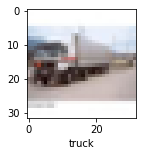

In [14]:
data_iter = iter(train_data_loader)
images, labels = data_iter.next()

for i in range (train_batch)
  image = images[0]
  label = labels[0]
image_show = np.transpose(image.numpy(),[1,2,0])
plt.figure(figsize=(2,2))
plt.imshow(image_show)
plt.xlabel(data_class[label])